In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


2025-04-17 23:11:41.565380: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Step 1: Load images and labels from directories

def load_images(dataset_path, image_size=(128, 128)):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        dataset_path,
        image_size=image_size,
        batch_size=None,  # Loads all images into one batch
        shuffle=True,
        seed=42
    )

    images = []
    labels = []

    for image, label in dataset:
        images.append(image.numpy().flatten())  # Flatten images into vectors
        labels.append(label.numpy())

    return np.array(images), np.array(labels), dataset.class_names

In [3]:
# Load training data
X_train, y_train, class_names = load_images("archive/Training")

Found 2870 files belonging to 4 classes.


2025-04-18 01:09:03.357044: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [4]:
# Load testing data
X_test, y_test, _ = load_images("archive/Testing")

Found 394 files belonging to 4 classes.


2025-04-18 01:09:13.596825: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
# Optional: Scale pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# Step 2: Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [7]:
# Step 3: Predictions
predictions = rf_classifier.predict(X_test)

In [8]:

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Random Forest Accuracy: {accuracy:.2f}")

Random Forest Accuracy: 0.69


In [9]:
# Classification report
print(classification_report(y_test, predictions, target_names=class_names))

                  precision    recall  f1-score   support

    glioma_tumor       1.00      0.20      0.33       100
meningioma_tumor       0.80      0.97      0.87       115
        no_tumor       0.54      1.00      0.70       105
 pituitary_tumor       0.93      0.50      0.65        74

        accuracy                           0.69       394
       macro avg       0.82      0.67      0.64       394
    weighted avg       0.80      0.69      0.65       394



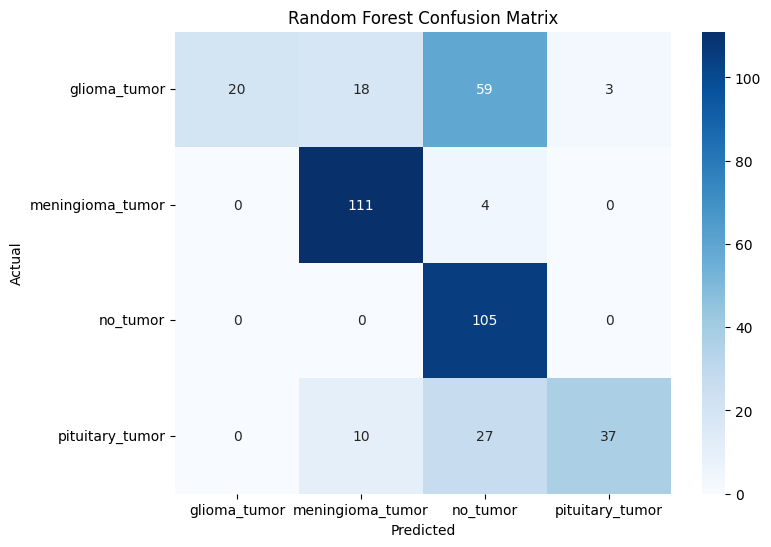

In [10]:

# Confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()
